<h1> Energy Comsumption Time Series</h1>

In [146]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
import sklearn
sns.set()
sns.set(style="darkgrid")

In [147]:
# Read the timeseries dataset
data=pd.read_csv("energy_consumption.csv")
data.head()

,DATE,ENERGY_INDEX
0,01/1939,3.3842
1,02/1939,3.4100
2,03/1939,3.4875
3,04/1939,3.5133
4,05/1939,3.5133


In [148]:
data.shape

(969, 2)

In [149]:
data.describe()

,ENERGY_INDEX
count,969.000000
mean,54.657608
std,35.455379
min,3.384200
25%,19.581700
50%,54.763700
75%,87.729300
max,128.907100


In [150]:
data.dtypes

DATE             object
ENERGY_INDEX    float64
dtype: object

In [151]:
# Since DATE is object in the dataframe, that is why we convert it to datetime
data['DATE'] = pd.to_datetime(data['DATE'],format='%m/%Y')
data.index = data['DATE']
#data.drop(['DATE'],axis = 1,inplace = True)

In [152]:
data.dtypes

DATE            datetime64[ns]
ENERGY_INDEX           float64
dtype: object

In [153]:
data.head()

,DATE,ENERGY_INDEX
DATE,,
1939-01-01,1939-01-01,3.3842
1939-02-01,1939-02-01,3.4100
1939-03-01,1939-03-01,3.4875
1939-04-01,1939-04-01,3.5133
1939-05-01,1939-05-01,3.5133


In [154]:
data.index.min(), data.index.max()

(Timestamp('1939-01-01 00:00:00'), Timestamp('2019-09-01 00:00:00'))

In [155]:
data.index.max()-data.index.min()

Timedelta('29463 days 00:00:00')

In [156]:
data.isnull().sum()

DATE            0
ENERGY_INDEX    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

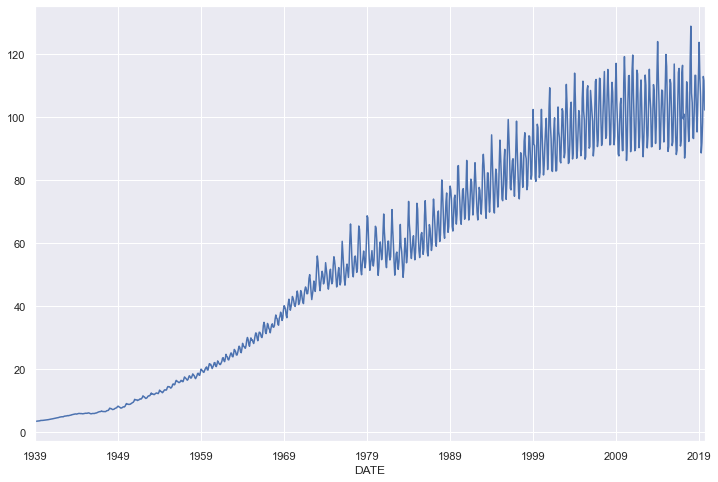

In [157]:
plt.figure(figsize=(12,8))
data["ENERGY_INDEX"].plot()

<h2>Observations</h2>
<ul>
    <li>The data is recorded on a monthly basis.</li>
    <li>It is a single feature time series.</li>
    <li>Time Duration in the series -  Timestamp('1939-01-01 00:00:00') to Timestamp('2019-09-01 00:00:00')</li>
    <li>Timedelta --> '29463 days 00:00:00'</li>
    <li>Energy consumption index is recorded on monthly basis from 1939 to 2019</li>
    <li>There are no missing data.</li>
    <li>Energy consumption range (3.384200,128.907100)</li>
</ul>

<h2>Adding features to the data</h2>

In [158]:
data_feat = pd.DataFrame({"year": data['DATE'].dt.year,
                          "month": data['DATE'].dt.month,
                          "quarter": data['DATE'].dt.quarter,
                         })
data_feat.head()

,year,month,quarter
DATE,,,
1939-01-01,1939,1,1
1939-02-01,1939,2,1
1939-03-01,1939,3,1
1939-04-01,1939,4,2
1939-05-01,1939,5,2


In [159]:
complete_data = pd.concat([data_feat, data["ENERGY_INDEX"]], axis=1)
complete_data.head()

,year,month,quarter,ENERGY_INDEX
DATE,,,,
1939-01-01,1939,1,1,3.3842
1939-02-01,1939,2,1,3.4100
1939-03-01,1939,3,1,3.4875
1939-04-01,1939,4,2,3.5133
1939-05-01,1939,5,2,3.5133


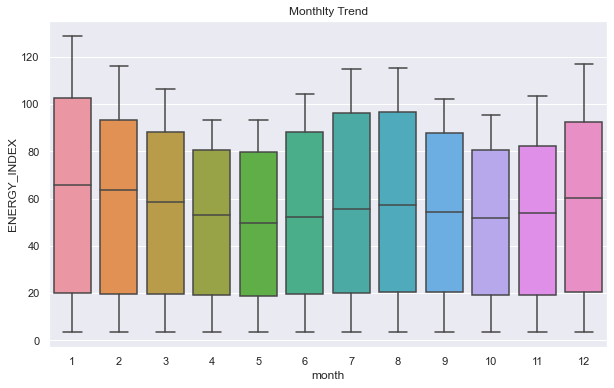

In [160]:
# boxplot for monthly energy consumption
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['month'], y=complete_data['ENERGY_INDEX'], )
plt.title('Monthlty Trend')
plt.show()

<h3> Observations</h3>
<ul>
    <li>There are no outliers.</li>
    <li>The energy consumption are higher in the periods of extreme weather/temperature typical of the northern hemisphere i.e. December-January(in winters) and July-August (in summer) </li>
</ul>

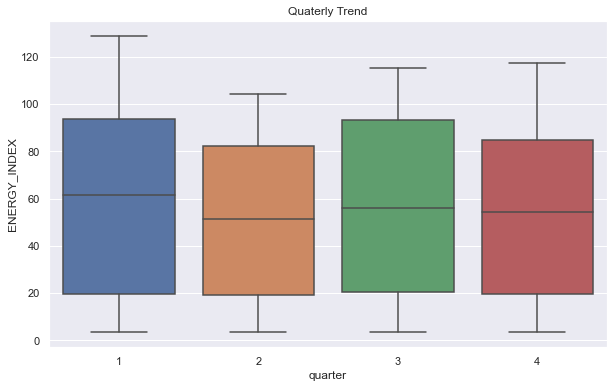

In [161]:
# boxplot for quaterly energy consumption
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['quarter'], y=complete_data['ENERGY_INDEX'],)
plt.title('Quaterly Trend')
plt.show()

<h3> Observations</h3>
<ul>
    <li>There are no outliers.</li>
    <li>The energy consumption highest in the first quarter of the year</li>
</ul>

<h3>Plot of trends and seasonality</h3>

In [162]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_series = seasonal_decompose(data['ENERGY_INDEX'],)

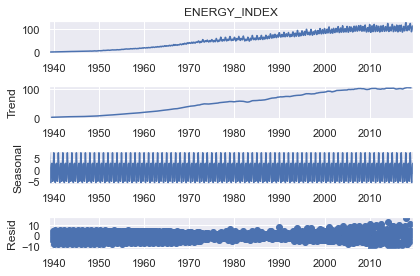

In [163]:
decomposed_series.plot()
plt.show()

<AxesSubplot:xlabel='DATE'>

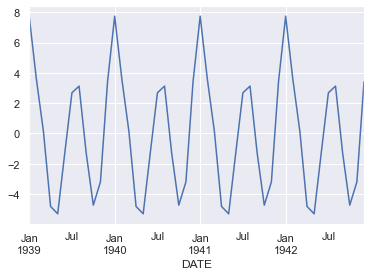

In [164]:
(decomposed_series.seasonal[0:48]).plot()

<h3> Observations</h3>
<ul>
    <li>Increasing trend</li>
    <li>There isn't significant difference between peaks and troughs</li>
    <li> Yearly Seasonality</li>
    <li>Therefore, we can conclude that it is an additive series</li>
</ul>

<h3>Time Series Cross Validation </h3>

In [165]:
from sklearn.model_selection import TimeSeriesSplit

In [166]:
time_series_cv = TimeSeriesSplit(n_splits=5)
print(time_series_cv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [167]:
for train_index, test_index in time_series_cv.split(data):
    print('----- ----- ----')
    print("TRAIN:", train_index[0], 'to', train_index[-1])
    print("TEST:", test_index[0], 'to', test_index[-1])

----- ----- ----
TRAIN: 0 to 163
TEST: 164 to 324
----- ----- ----
TRAIN: 0 to 324
TEST: 325 to 485
----- ----- ----
TRAIN: 0 to 485
TEST: 486 to 646
----- ----- ----
TRAIN: 0 to 646
TEST: 647 to 807
----- ----- ----
TRAIN: 0 to 807
TEST: 808 to 968


<h3>Linear Regression</h3>

In [168]:
from sklearn.linear_model import LinearRegression

<h4>Creating train and valid sets</h4>

In [169]:
model = LinearRegression(normalize=True)

----- ----- ----
TRAIN: 0 to 163
TEST: 164 to 324
Model training on set 1
The RMSE value is 7.282135541725421


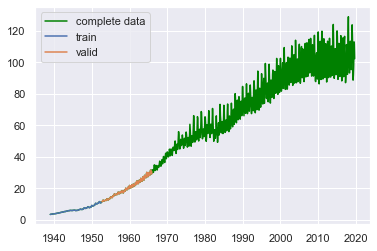

----- ----- ----
TRAIN: 0 to 324
TEST: 325 to 485
Model training on set 2
The RMSE value is 13.710774713901841


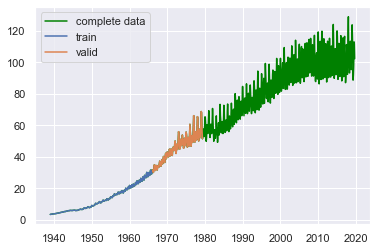

----- ----- ----
TRAIN: 0 to 485
TEST: 486 to 646
Model training on set 3
The RMSE value is 5.878771321871599


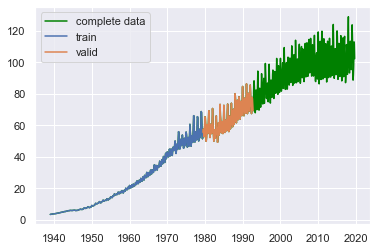

----- ----- ----
TRAIN: 0 to 646
TEST: 647 to 807
Model training on set 4
The RMSE value is 8.750284404443867


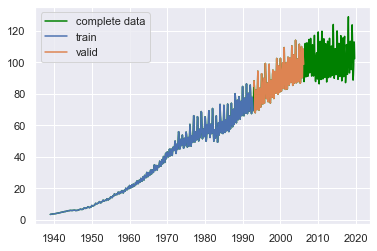

----- ----- ----
TRAIN: 0 to 807
TEST: 808 to 968
Model training on set 5
The RMSE value is 12.110142473057058


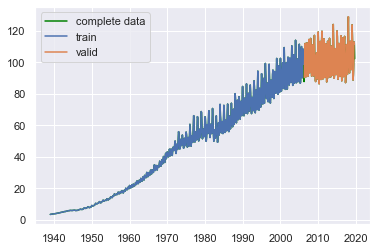

In [170]:
plt.figure(figsize=(6,4))
i = 0
for train_index, test_index in time_series_cv.split(data):
    print('----- ----- ----')
    print("TRAIN:", train_index[0], 'to', train_index[-1])
    print("TEST:", test_index[0], 'to', test_index[-1])
    plt.plot(data.index, data['ENERGY_INDEX'], label='complete data', color='green')
    x_train = (complete_data[train_index[0]:train_index[-1]]).drop('ENERGY_INDEX', axis=1)
    y_train = (complete_data[train_index[0]:train_index[-1]]['ENERGY_INDEX'])
    x_valid = (complete_data[test_index[0]:test_index[-1]]).drop('ENERGY_INDEX', axis=1)
    y_valid = (complete_data[test_index[0]:test_index[-1]]['ENERGY_INDEX'])
    
    print('Model training on set', i+1)
    model.fit(x_train,y_train)
    preds_valid = model.predict(x_valid)
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_valid, preds_valid))
    print('The RMSE value is', rmse)
    plt.plot(data[train_index[0]:train_index[-1]].index,data['ENERGY_INDEX'][train_index[0]:train_index[-1]],label='train')
    plt.plot(data[test_index[0]:test_index[-1]].index,data['ENERGY_INDEX'][test_index[0]:test_index[-1]],label='valid')
    
    plt.legend(loc='best')
    plt.show()
    i=i+1

<h3>Holt's Winters (aka triple exponential smoothing)</h3>

In [171]:
from statsmodels.tsa.api import ExponentialSmoothing

<h4>Reading test and train data</h4>

<p> To have the predictions on the data of next 3 years, our valid dataset needs to have data for the last 36 months</p>

In [172]:
train_data = complete_data[:933]
valid_data = complete_data[933:]

In [173]:
print(train_data.shape)
train_data.tail()

(933, 4)


,year,month,quarter,ENERGY_INDEX
DATE,,,,
2016-05-01,2016,5,2,89.4711
2016-06-01,2016,6,2,103.4258
2016-07-01,2016,7,3,114.1946
2016-08-01,2016,8,3,115.5015
2016-09-01,2016,9,3,102.2398


In [174]:
print(valid_data.shape)
valid_data.head()

(36, 4)


,year,month,quarter,ENERGY_INDEX
DATE,,,,
2016-10-01,2016,10,4,90.8499
2016-11-01,2016,11,4,92.6032
2016-12-01,2016,12,4,114.0219
2017-01-01,2017,1,1,116.4746
2017-02-01,2017,2,1,99.5393


<h3>Forecasting</h3>

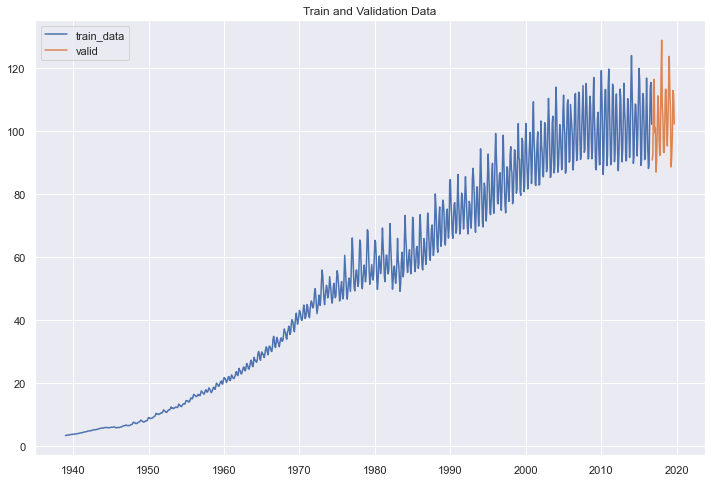

In [175]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

In [176]:
model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']) ,seasonal_periods=12 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.08, smoothing_slope=0.07, smoothing_seasonal=0.08) #

valid_data['Holt_Winter'] = fit1.forecast(len(valid_data)) 

In [177]:
model.params

{'smoothing_level': 0.08,
 'smoothing_trend': 0.07,
 'smoothing_seasonal': 0.08,
 'damping_trend': nan,
 'initial_level': 2.617738270649383,
 'initial_trend': 0.00993233345872806,
 'initial_seasons': array([1.65389863, 1.42513779, 1.18510543, 0.95044098, 0.9774511 ,
        1.20418856, 1.38576245, 1.37263186, 1.14718549, 1.03994062,
        1.17009912, 1.46850713]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

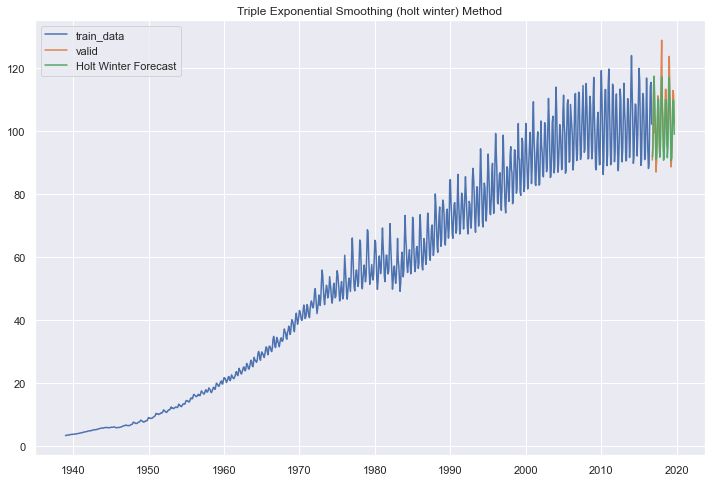

In [178]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='Holt Winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [179]:
# calculating RMSE 
rmse = math.sqrt(sklearn.metrics.mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 4.320381431777254


<H3> SARIMA Model Forecasting </H3>

<h3>Stationarity Test</h3>

In [180]:
# dickey fuller
from statsmodels.tsa.stattools import adfuller

In [181]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [182]:
adf_test(train_data['ENERGY_INDEX'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.374861
p-value                          0.914212
#Lags Used                      21.000000
Number of Observations Used    911.000000
Critical Value (1%)             -3.437548
Critical Value (5%)             -2.864718
Critical Value (10%)            -2.568462
dtype: float64


- If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). 
- When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary). 

**Here test statistic is > than critical. Hence series is not stationary**

<h3>Making Series Stationary</h3>

In [183]:
train_data['energy_diff'] = train_data['ENERGY_INDEX'] - train_data['ENERGY_INDEX'].shift(1)

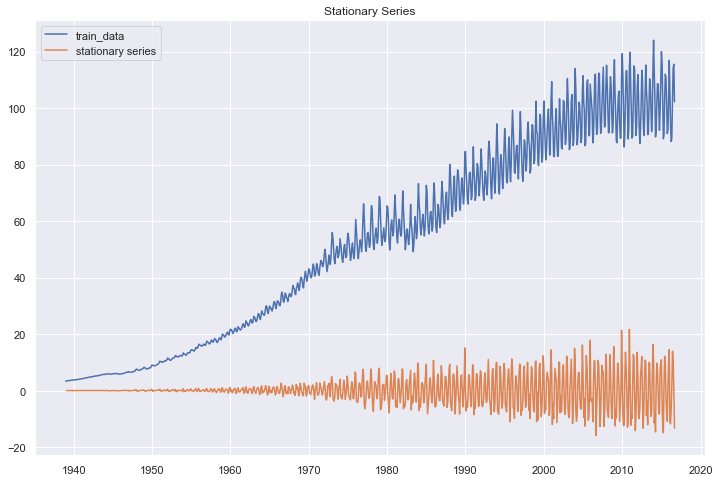

In [184]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(train_data.index,train_data['energy_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [185]:
train_data['energy_log'] = np.log(train_data['ENERGY_INDEX'])
train_data['energy_log_diff'] = train_data['energy_log'] - train_data['energy_log'].shift(1)

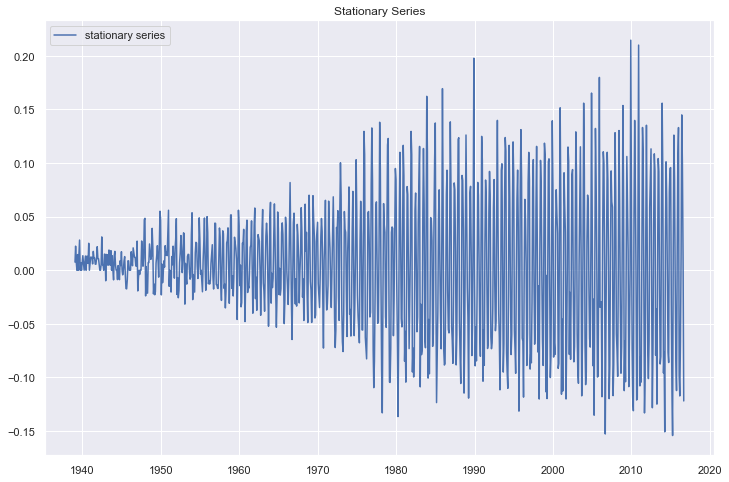

In [186]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['energy_log_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [187]:
adf_test(train_data['energy_log_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -5.150907
p-value                          0.000011
#Lags Used                      21.000000
Number of Observations Used    910.000000
Critical Value (1%)             -3.437556
Critical Value (5%)             -2.864721
Critical Value (10%)            -2.568464
dtype: float64


**Here test statistic is < than critical. Hence series is stationary now.**

<h3>Using box cox</h3>

In [188]:
from scipy import stats

In [189]:
transformed_data, lambda_value = stats.boxcox(train_data['ENERGY_INDEX'], lmbda=None)

In [190]:
lambda_value

0.5607719331935312

In [191]:
train_data['energy_boxcox'] = transformed_data
train_data['energy_boxcox_diff'] = train_data['energy_boxcox'] - train_data['energy_boxcox'].shift(1)

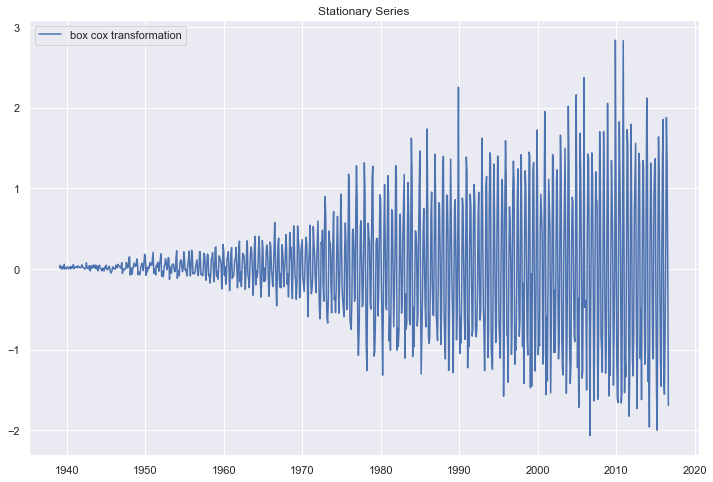

In [192]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['energy_boxcox_diff'], label='box cox transformation')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

<h3>ACF and PACF plots</h3>

In [193]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 864x576 with 0 Axes>

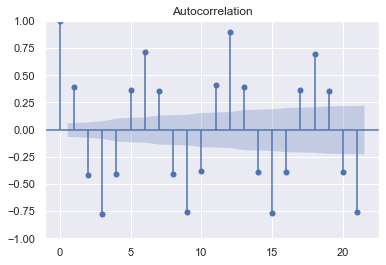

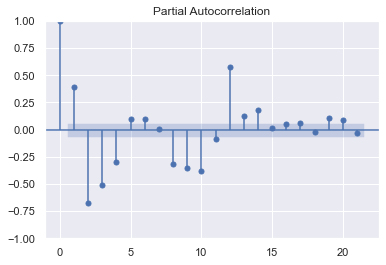

In [194]:
plt.figure(figsize=(12,8))
plot_acf(train_data['energy_log_diff'].dropna(), lags=21)
plot_pacf(train_data['energy_log_diff'].dropna(), lags=21)
plt.show()

   - p value is the lag value where the PACF chart crosses the confidence interval for the first time. It can be noticed that in this case p=3.

   - q value is the lag value where the ACF chart crosses the confidence interval for the first time. It can be noticed that in this case q=2.

   - Now we will make the ARIMA model as we have the p,q values.

<h3>AR model</h3>

In [195]:
from statsmodels.tsa.arima.model import ARIMA

In [196]:
# fit AR model --> p=3 d=1
model = ARIMA(train_data['energy_log'], order=(3,1,0))
model_fit = model.fit()

In [211]:
output = model_fit.forecast(36)
#valid_data['AR'] = (pd.DataFrame(output[0])).values
valid_data['AR']=output
#valid_data.head()

In [213]:
#valid_data['AR'] = np.exp(valid_data['AR'])
valid_data.head()

,year,month,quarter,ENERGY_INDEX,Holt_Winter,AR
DATE,,,,,,
2016-10-01,2016,10,4,90.8499,91.900716,4.533583
2016-11-01,2016,11,4,92.6032,95.088254,4.538938
2016-12-01,2016,12,4,114.0219,108.882882,4.633953
2017-01-01,2017,1,1,116.4746,117.470790,4.710359
2017-02-01,2017,2,1,99.5393,109.101379,4.700199


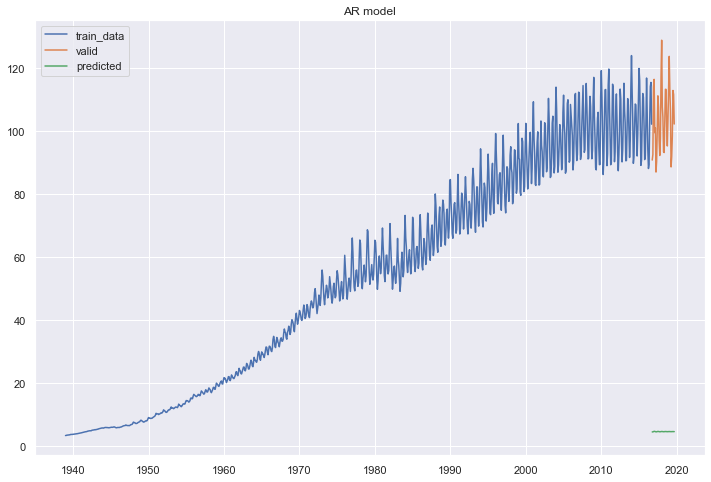

In [214]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index, valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index, valid_data['AR'], label='predicted')

plt.legend(loc='best')
plt.title("AR model")
plt.show()

In [224]:
# calculating RMSE 
rmse = math.sqrt(sklearn.metrics.mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['AR']))
print('The RMSE value for AR is', rmse)

The RMSE value for AR is 99.67851062072454


<h3>MA model</h3>

In [ ]:
# fit MA model
model = ARIMA(train_data['count_log'], order=(0,1,2))
model_fit = model.fit()

In [219]:
output = model_fit.forecast(36)
valid_data['MA']=output
valid_data.head()

,year,month,quarter,ENERGY_INDEX,Holt_Winter,AR,MA
DATE,,,,,,,
2016-10-01,2016,10,4,90.8499,91.900716,4.533583,4.533583
2016-11-01,2016,11,4,92.6032,95.088254,4.538938,4.538938
2016-12-01,2016,12,4,114.0219,108.882882,4.633953,4.633953
2017-01-01,2017,1,1,116.4746,117.470790,4.710359,4.710359
2017-02-01,2017,2,1,99.5393,109.101379,4.700199,4.700199


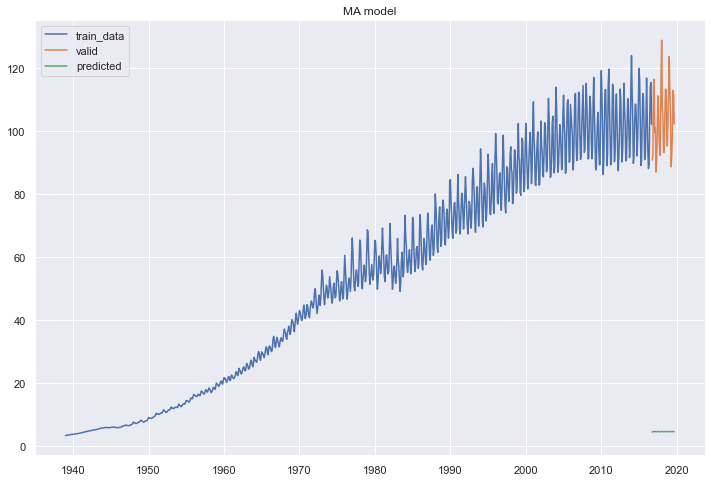

In [220]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index, valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index, valid_data['MA'], label='predicted')

plt.legend(loc='best')
plt.title("MA model")
plt.show()

In [223]:
# calculating RMSE 
rmse = math.sqrt(sklearn.metrics.mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['MA']))
print('The RMSE value for MA is', rmse)

The RMSE value for MA is 99.67851062072454
